In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# sklearn.ensemble
from sklearn.ensemble import *

from sklearn.metrics import *

# Dataset

In [2]:
digits = load_digits()
digits_df = pd.DataFrame(data=np.c_[digits['data'], digits['target']], columns=digits['feature_names'] + ['target'])
digits_x = digits.data
digits_y = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


# train_test_split

In [3]:
digits_x_train, digits_x_test, digits_y_train, digits_y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)
digits_x_train.shape, digits_x_test.shape

((1257, 64), (540, 64))

# BaggingRegressor

In [4]:
br = BaggingClassifier(n_estimators=5, random_state=10)
br.fit(digits_x_train, digits_y_train)
br_res = br.predict(digits_x_test)

# AdaBoostRegressor

In [5]:
adb = AdaBoostClassifier(n_estimators=5, random_state=10)
adb.fit(digits_x_train, digits_y_train)
adb_res = adb.predict(digits_x_test)

# ExtraTreesRegressor

In [6]:
ext = ExtraTreesClassifier(n_estimators=5, random_state=10)
ext.fit(digits_x_train, digits_y_train)
ext_res = ext.predict(digits_x_test)

# Визуализация и сравнение

In [7]:
def get_arr(results, metr, y):
    arr = []
    for i in results:
        arr.append(metr(i, y))
    return arr

In [8]:
models = [br, adb, ext]
results = [br_res, adb_res, ext_res]
metr = mean_absolute_error

In [9]:
m_arr = get_arr(results, metr, digits_y_test)

In [10]:
m_arr

[0.3685185185185185, 2.35, 0.3037037037037037]

In [11]:
mod = []
for i in models:
    mod.append(i.__class__.__name__)
mod

['BaggingClassifier', 'AdaBoostClassifier', 'ExtraTreesClassifier']

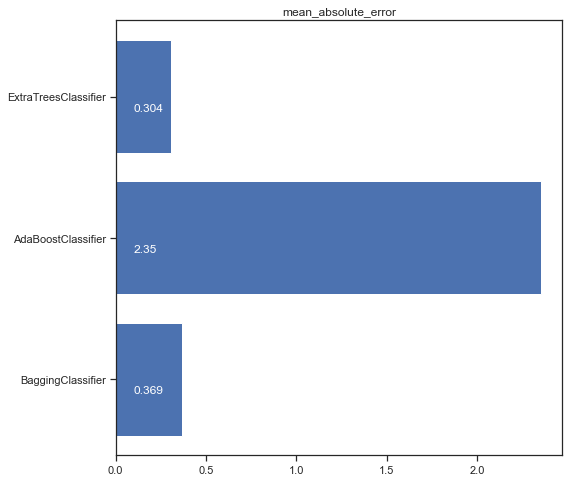

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.barh(np.array(mod),np.array(m_arr) , align='center')
ax.set_title(metr.__name__)

pos = np.arange(len(mod))
for a,b in zip(pos, m_arr):
    ax.text(0.1, a-0.1, str(round(b,3)), color='white')
plt.show()